<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Housing_Prices_Prediction_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Prediction Competition
Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
https://www.kaggle.com/competitions/home-data-for-ml-course/overview

- File descriptions
  - train.csv - the training set
  - test.csv - the test set
  - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
  - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

# Exploring Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Read dataset
X_full = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

In [2]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_full.shape

(1460, 80)

In [4]:
X_full.isna().sum().sum()

6965

## Col Dtypes

In [5]:
numeric_cols = X_full.select_dtypes(exclude=['object'])
cat_cols = X_full.select_dtypes(include=['object'])

## Visualizing Categorical Variables

In [6]:
categorical_cols = cat_cols.columns

In [7]:
def isnull(cols):
  total = 0
  for column in cols:
    nans = X_full[column].isna().sum()
    total += nans
    if nans > 0:
      print(column + " - " + str(nans))
  print("Total missing: "+ str(total))

In [8]:
isnull(list(categorical_cols))

Alley - 1369
MasVnrType - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
FireplaceQu - 690
GarageType - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PoolQC - 1453
Fence - 1179
MiscFeature - 1406
Total missing: 6617


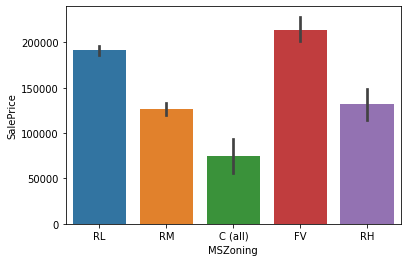

In [9]:
sns.barplot(x='MSZoning', y='SalePrice', data=X_full)
plt.show()

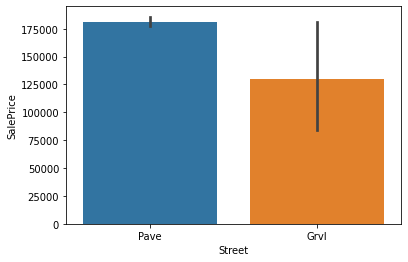

In [10]:
sns.barplot(x='Street', y='SalePrice', data=X_full)
plt.show()

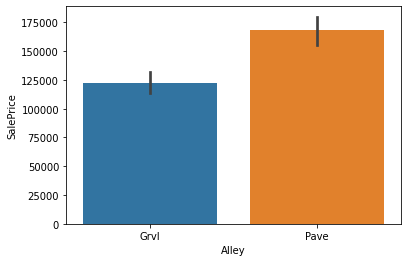

In [11]:
sns.barplot(x='Alley', y='SalePrice', data=X_full)
plt.show()

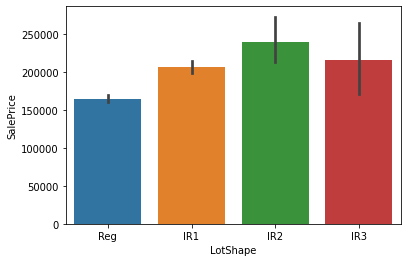

In [12]:
sns.barplot(x='LotShape', y='SalePrice', data=X_full)
plt.show()

# Feature Engineering

Encoding object as an enumerated type or categorical variable.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_full.copy()
label_X_valid = X_test_full.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

label_X_train[categorical_cols] = ordinal_encoder.fit_transform(X_full[categorical_cols])
label_X_valid[categorical_cols] = ordinal_encoder.transform(X_test_full[categorical_cols])

# Transform missing values to -1
label_X_train[categorical_cols] = label_X_train[categorical_cols].fillna(-1)
label_X_valid[categorical_cols] = label_X_valid[categorical_cols].fillna(-1)

In [14]:
# Feature Factorization

# X_full[categorical_cols] = X_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])
# X_test_full[categorical_cols] = X_test_full[categorical_cols].apply(lambda x: pd.factorize(x)[0])

In [15]:
label_X_train.shape

(1460, 80)

In [16]:
label_X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3.0,65.0,8450,1.0,-1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706,5.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,-1.0,1.0,2003.0,1.0,2,548,4.0,4.0,2.0,0,61,0,0,0,0,-1.0,-1.0,-1.0,0,2,2008,8.0,4.0,208500
2,20,3.0,80.0,9600,1.0,-1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978,5.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,4.0,1.0,1976.0,1.0,2,460,4.0,4.0,2.0,298,0,0,0,0,0,-1.0,-1.0,-1.0,0,5,2007,8.0,4.0,181500
3,60,3.0,68.0,11250,1.0,-1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486,5.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,4.0,1.0,2001.0,1.0,2,608,4.0,4.0,2.0,0,42,0,0,0,0,-1.0,-1.0,-1.0,0,9,2008,8.0,4.0,223500
4,70,3.0,60.0,9550,1.0,-1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216,5.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,2.0,3,642,4.0,4.0,2.0,0,35,272,0,0,0,-1.0,-1.0,-1.0,0,2,2006,8.0,0.0,140000
5,60,3.0,84.0,14260,1.0,-1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655,5.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,4.0,1.0,2000.0,1.0,3,836,4.0,4.0,2.0,192,84,0,0,0,0,-1.0,-1.0,-1.0,0,12,2008,8.0,4.0,250000


In [17]:
missing_cat = (label_X_train[categorical_cols].isna().sum())
missing_cat[missing_cat > 0]

Series([], dtype: int64)

In [18]:
# Missing
label_X_train[categorical_cols].isna().sum().sum()

0

# Data Splitting

In [19]:
# Remove rows with missing target, separate target from predictors
label_X_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = label_X_train.SalePrice
label_X_train.drop(['SalePrice'], axis=1, inplace=True)

In [20]:
label_X_train.isna().sum().sum()

348

In [21]:
X = label_X_train
X_test = label_X_valid

# Data Splitting (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preliminary Investigation

In [22]:
X_train.shape

(1168, 79)

In [23]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,20,3.0,90.0,11694,1.0,-1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,2.0,9,5,2007,2007,3.0,1.0,5.0,5.0,1.0,452.0,0.0,4.0,2.0,0.0,3.0,0.0,2.0,48,5.0,0,1774,1822,1.0,0.0,1.0,4.0,1828,0,0,1828,0,0,2,0,3,1,2.0,9,6.0,1,2.0,1.0,2007.0,2.0,3,774,4.0,4.0,2.0,0,108,0,0,260,0,-1.0,-1.0,-1.0,0,7,2007,6.0,5.0
871,20,3.0,60.0,6600,1.0,-1.0,3.0,3.0,0.0,4.0,0.0,12.0,4.0,2.0,0.0,2.0,5,5,1962,1962,3.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0,5.0,0,894,894,1.0,2.0,0.0,4.0,894,0,0,894,0,0,1,0,2,1,3.0,5,6.0,0,-1.0,5.0,1962.0,2.0,1,308,4.0,4.0,2.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,0,8,2009,8.0,4.0
93,30,3.0,80.0,13360,1.0,0.0,0.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,2.0,5,7,1921,2006,1.0,1.0,13.0,14.0,2.0,0.0,3.0,2.0,0.0,2.0,3.0,3.0,0.0,713,5.0,0,163,876,1.0,0.0,1.0,4.0,964,0,0,964,1,0,1,0,2,1,3.0,5,6.0,0,-1.0,5.0,1921.0,2.0,2,432,4.0,4.0,2.0,0,0,44,0,0,0,-1.0,-1.0,-1.0,0,8,2009,8.0,4.0
818,20,3.0,NaN,13265,1.0,-1.0,0.0,3.0,0.0,1.0,0.0,11.0,2.0,2.0,0.0,2.0,8,5,2002,2002,3.0,1.0,5.0,5.0,1.0,148.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,1218,5.0,0,350,1568,1.0,0.0,1.0,4.0,1689,0,0,1689,1,0,2,0,3,1,2.0,7,6.0,2,2.0,1.0,2002.0,1.0,3,857,4.0,4.0,2.0,150,59,0,0,0,0,-1.0,-1.0,-1.0,0,7,2008,8.0,4.0
303,20,3.0,118.0,13704,1.0,-1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,150.0,2.0,4.0,2.0,2.0,3.0,3.0,5.0,0,5.0,0,1541,1541,1.0,0.0,1.0,4.0,1541,0,0,1541,0,0,2,0,3,1,2.0,6,6.0,1,4.0,1.0,2001.0,1.0,3,843,4.0,4.0,2.0,468,81,0,0,0,0,-1.0,-1.0,-1.0,0,1,2006,8.0,4.0


In [24]:
missing = (X_train.isnull().sum())
missing[missing > 0]

LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
  model = RandomForestRegressor(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  return mean_absolute_error(y_valid, predictions)

## Drop columns with missing values
In this step, you'll preprocess the data in X_train and X_valid to remove columns with missing values. Set the preprocessed DataFrames to reduced_X_train and reduced_X_valid, respectively.

In [26]:
# get names of columns with missing values
cols_missing = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

# drop columns in training and validation data
reduced_X_train = X_train.drop(cols_missing, axis=1)
reduced_X_valid = X_test.drop(cols_missing, axis=1)

# Imputation

In [27]:
from sklearn.impute import SimpleImputer

# imputation
imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imputer.transform(X_test))


# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

In [28]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_test))

MAE (Drop columns with missing values):
16782.44184931507


In [29]:
print("MAE (Imputed values):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_test))

MAE (Imputed values):
17169.14455479452


Feature Factorization
- MAE (Drop columns with missing values): 16782.44184931507
- MAE (Imputed values): 17169.14455479452

# Evaluating Different models


In [34]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, SGDRegressor, Ridge
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          "Ridge": Ridge(alpha=0.1),
          "Lasso": Lasso(alpha=0.1),
          'Bayesian Ridge': BayesianRidge(),
          'SGDRegressor': SGDRegressor(),
          'XGBRegressor':XGBRegressor()
        }

## Cross-validation: evaluating estimator performance

[12:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


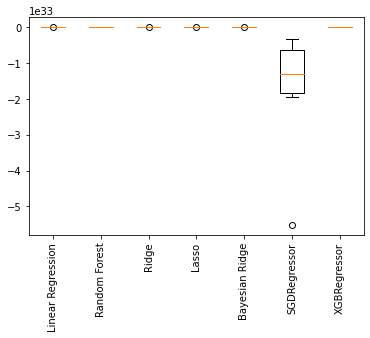

In [35]:
results = []
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_res = cross_val_score(model, reduced_X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
  results.append(cv_res)

plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=90)
plt.show()

## Test set performance

In [36]:
from sklearn.metrics import mean_squared_error

bestmodel = None
for name, model in models.items():
  print(name.upper(), '\n')
  model.fit(reduced_X_train, y_train)
  test_score = model.score(reduced_X_valid, y_test)
  print("Test Set Coefficient of determination(R^2): {}".format(test_score))

  predictions = model.predict(reduced_X_valid)
  RMSE = mean_squared_error(y_test, predictions, squared=False)
  print("Test Set RMSE: {}".format(RMSE))

  MAE = mean_absolute_error(y_test, predictions)
  print("Test Set MAE: {}".format(MAE))
  print('='*60)

  
  if(bestmodel == None):
    bestmodel = {'model': name, 'RMSE': RMSE}
  else:
    if(RMSE > bestmodel['RMSE']):
      bestmodel = {'model': name, 'RMSE': RMSE}

print('Best Model: ', bestmodel)

LINEAR REGRESSION 

Test Set Coefficient of determination(R^2): 0.5289190539871453
Test Set RMSE: 57036.95586254265
Test Set MAE: 24989.62006814329
RANDOM FOREST 

Test Set Coefficient of determination(R^2): 0.8520110482430648
Test Set RMSE: 31968.570458554383
Test Set MAE: 16988.887431506853
RIDGE 

Test Set Coefficient of determination(R^2): 0.5331781426056657
Test Set RMSE: 56778.53209693556
Test Set MAE: 24944.77257466662
LASSO 

Test Set Coefficient of determination(R^2): 0.5290264692268332
Test Set RMSE: 57030.452747076335
Test Set MAE: 24988.272000721834
BAYESIAN RIDGE 

Test Set Coefficient of determination(R^2): 0.6627750081936101
Test Set RMSE: 48257.90295409924
Test Set MAE: 21570.73285785329
SGDREGRESSOR 

Test Set Coefficient of determination(R^2): -6.47194056069864e+23
Test Set RMSE: 6.68537586737903e+16
Test Set MAE: 5.1348975926097736e+16
XGBREGRESSOR 

[12:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar